<a href="https://colab.research.google.com/github/anadiedrichs/2023-computer-vision-final/blob/main/VISION_II_PROYECTO_Diedrichs_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final Visión Computacional II

## Datos de la alumna:

Ana Laura Diedrichs

Email: analauradiedrichs@gmail.com

SIU a0902

## Motivación

La aplicación y uso de modelos de detección de imágenes aplicados a frutas y verduras ofrece una serie de beneficios significativos en diversos ámbitos, especialmente en la lucha contra el desperdicio de alimentos. Según la Organización de las Naciones Unidas para la Alimentación y la Agricultura (FAO), aproximadamente un tercio de todos los alimentos producidos en el mundo para consumo humano se pierde o desperdicia cada año. Esta cifra equivale a aproximadamente 1.3 mil millones de toneladas de alimentos. Se estima que el valor económico total de los alimentos desperdiciados anualmente alcanza los 750 mil millones de dólares. Esta cifra incluye los costos de producción, transporte, almacenamiento y pérdida de ingresos para los agricultores y otros actores de la cadena de suministro.

Los modelos de detección de imágenes aplicados a frutas y verduras no solo ofrecen beneficios en términos de eficiencia y calidad en la cadena de suministro, sino que también juegan un papel crucial en la reducción del desperdicio de alimentos. Alguna de las ventajas que podría brindar la detección y clasificación de vegetales serían:

* Minimización del desperdicio en la producción: los modelos de detección de imágenes pueden utilizarse en las etapas tempranas de la cadena de producción agrícola para identificar cultivos con problemas de salud o plagas. Al detectar oportunamente estos problemas, los agricultores pueden tomar medidas preventivas específicas en áreas afectadas, evitando pérdidas masivas y reduciendo el desperdicio desde el origen.
* Clasificación más precisa en el empaque: la detección de imágenes permite una clasificación más precisa de frutas y verduras durante el proceso de empaque y selección, lo que asegura que solo los productos de alta calidad y aptos para el consumo lleguen a los mercados. Esto reduce la cantidad de alimentos descartados debido a defectos mínimos que no afectan su valor nutricional ni su sabor.
* Extensión de la vida útil de los alimentos: al detectar frutas y verduras maduras o con señales de deterioro avanzado, se pueden priorizar para su venta o procesamiento inmediato, lo que contribuye a extender la vida útil de los productos en los estantes de los supermercados o en los hogares. Esto disminuye la probabilidad de que los alimentos sean descartados antes de su consumo óptimo.
* Aprovechamiento de alimentos "feos": Los modelos de detección de imágenes también han demostrado ser efectivos en promover la comercialización y consumo de frutas y verduras estéticamente menos atractivas pero perfectamente aptas para el consumo. Al impulsar la venta de productos "feos" o "imperfectos", se reduce el desperdicio alimentario y se fomenta una cultura de consumo más sostenible.
* Gestión más eficiente de inventarios: para evitar la sobrecompra y el exceso de inventario, lo que a su vez reduce las posibilidades de que los alimentos no se vendan a tiempo y terminen siendo desperdiciados.
*Donación de alimentos seguros: Con la detección de imágenes, es posible identificar frutas y verduras que están cerca de alcanzar su fecha límite de consumo pero que aún son seguras para su ingesta. Estos alimentos pueden dirigirse hacia programas de donación de alimentos o descuentos especiales, evitando que se desperdicien y llegando a personas necesitadas.

Como interés personal, y ajeno al alcance de esta materia, me gustaría poder obtener un modelo para ejecutar en un sistema embebido para que pueda ser aplicado en refrigeradores o cadenas de producción, alertando los ingredientes disponibles.




## Librerias

In [1]:
from keras.models import Sequential , Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.utils import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator # data augmentation
import matplotlib.pyplot as plt
from glob import glob # directorios
# Transfer learning
# https://keras.io/api/applications/mobilenet/
from keras.applications.mobilenet import MobileNet, preprocess_input



## Dataset

El conjunto de datos a utilizar será el Fruit360 [1]




### Descarga del dataset

Clonamos el repositorio de Git alojado en Github del dataset.

In [2]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 29.32 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [3]:
!ls Fruit-Images-Dataset/Test

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [4]:
!ls Fruit-Images-Dataset/Training/Blueberry

0_100.jpg    20_100.jpg   42_100.jpg	 r_141_100.jpg	r_281_100.jpg
100_100.jpg  203_100.jpg  43_100.jpg	 r_142_100.jpg	r_282_100.jpg
10_100.jpg   204_100.jpg  44_100.jpg	 r_143_100.jpg	r_283_100.jpg
101_100.jpg  205_100.jpg  46_100.jpg	 r_144_100.jpg	r_284_100.jpg
102_100.jpg  206_100.jpg  47_100.jpg	 r_145_100.jpg	r_285_100.jpg
103_100.jpg  209_100.jpg  48_100.jpg	 r_146_100.jpg	r_286_100.jpg
104_100.jpg  2_100.jpg	  49_100.jpg	 r_147_100.jpg	r_287_100.jpg
105_100.jpg  21_100.jpg   5_100.jpg	 r_148_100.jpg	r_288_100.jpg
106_100.jpg  211_100.jpg  52_100.jpg	 r_149_100.jpg	r_289_100.jpg
107_100.jpg  214_100.jpg  60_100.jpg	 r_150_100.jpg	r_290_100.jpg
108_100.jpg  218_100.jpg  6_100.jpg	 r_15_100.jpg	r_29_100.jpg
109_100.jpg  219_100.jpg  61_100.jpg	 r_151_100.jpg	r_291_100.jpg
1_100.jpg    22_100.jpg   62_100.jpg	 r_152_100.jpg	r_292_100.jpg
110_100.jpg  222_100.jpg  63_100.jpg	 r_153_100.jpg	r_293_100.jpg
11_100.jpg   223_100.jpg  66_100.jpg	 r_154_100.jpg	r_294_100.jpg
111_100.jpg  22

### Exploración del dataset

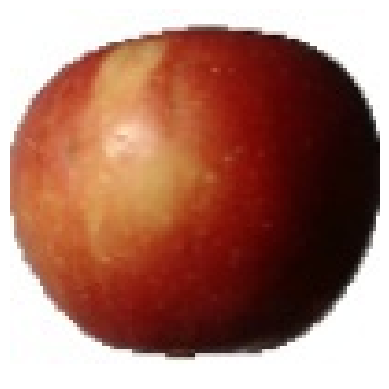

In [5]:
train_path = r"./Fruit-Images-Dataset/Training/"
test_path = r"./Fruit-Images-Dataset/Test/"

img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


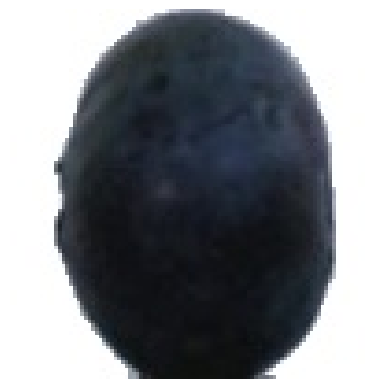

In [6]:
img = load_img(train_path + "Blueberry/r_0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


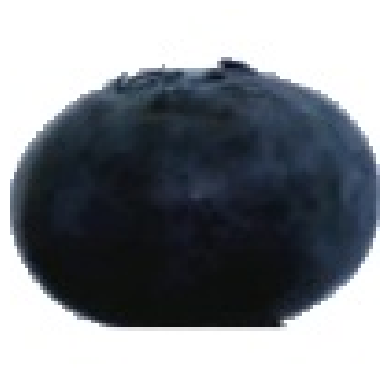

In [7]:
img = load_img(train_path + "Blueberry/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


El tamaño de la imagen es 100 x 100 píxeles (alto x ancho x profundidad o cantidad de canales que son tres)

In [8]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


Cada clase es un tipo de fruta o verdura y está almacenada en su directorio, por eso contamos la cantidad de directorios en la carpeta de entrenamiento.

In [9]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  131


Quiero saber cuántas imágenes hay por cada clase para observar si el conjunto de datos se encuentra o no balanceado.

In [10]:
import os

def count_files_in_directory(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        num_files = len([f for f in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, f))])
        print(f"Clase: {subdirectory}, #: {num_files}")

count_files_in_directory(train_path)


Clase: Guava, #: 490
Clase: Redcurrant, #: 492
Clase: Cocos, #: 490
Clase: Pear Stone, #: 711
Clase: Mango Red, #: 426
Clase: Onion Red Peeled, #: 445
Clase: Carambula, #: 490
Clase: Mandarine, #: 490
Clase: Dates, #: 490
Clase: Tangelo, #: 490
Clase: Pepper Yellow, #: 666
Clase: Corn, #: 450
Clase: Pomegranate, #: 492
Clase: Apple Red 1, #: 492
Clase: Tomato Cherry Red, #: 492
Clase: Apple Granny Smith, #: 492
Clase: Pear Red, #: 666
Clase: Cherry Rainier, #: 738
Clase: Grape Pink, #: 492
Clase: Grapefruit Pink, #: 490
Clase: Maracuja, #: 490
Clase: Potato Red Washed, #: 453
Clase: Nut Forest, #: 654
Clase: Apple Golden 1, #: 480
Clase: Peach, #: 492
Clase: Huckleberry, #: 490
Clase: Corn Husk, #: 462
Clase: Tomato not Ripened, #: 474
Clase: Cherry Wax Red, #: 492
Clase: Eggplant, #: 468
Clase: Cactus fruit, #: 490
Clase: Pear Monster, #: 490
Clase: Cucumber Ripe, #: 392
Clase: Grape White, #: 490
Clase: Peach 2, #: 738
Clase: Grape White 2, #: 490
Clase: Granadilla, #: 490
Clase: Pea

#### Propiedades del dataset

* Número total de imágenes: 90483.

* Tamaño del conjunto de entrenamiento: 67692 imágenes (una fruta o verdura por imagen).

* Tamaño del conjunto de prueba: 22688 imágenes (una fruta o verdura por imagen).

* Tamaño del conjunto de frutas múltiples: 103 imágenes (más de una fruta (o clase de fruta) por imagen)

* Número de clases: 131 (frutas y verduras).

* Tamaño de la imagen: 100x100 píxeles.

* Formato de nombre de archivo: image_index_100.jpg (por ejemplo, 32_100.jpg) o r_image_index_100.jpg (por ejemplo, r_32_100.jpg) o r2_image_index_100.jpg o r3_image_index_100.jpg. "r" significa fruta rotada. "r2" significa que la fruta se giró alrededor del tercer eje. "100" proviene del tamaño de la imagen (100x100 píxeles).

* Diferentes variedades de la misma fruta (manzana, por ejemplo) se almacenan como pertenecientes a diferentes clases.


####TODO imagen matriz ejemplo mostrando todos los vegetales o un grupo


## Objetivo

La tarea a resolver es construir modelos de clasificación que permitan distinguir entre distintos tipos de vegetales de este dataset.

Este sería un problema de clasificación multiclase. Para evaluar el desempeño utilizaremos métricas derivadas de las matriz de confusión como F1, precision y recall.

## Data Augmentation. Porque sí o porque no. Cuales se utilizaron y sus configuraciones.

In [11]:
batch_size = 32

# Data Generation - Train - Test
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.



## Arquitecturas de modelos a entrenar (al menos 2).

In [12]:
# CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [13]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=100,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

<ipython-input-13-b202754eede6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
50/50 [==============================] - 20s 136ms/step - loss: 4.7742 - accuracy: 0.0206 - val_loss: 4.3797 - val_accuracy: 0.0525
Epoch 2/100
50/50 [==============================] - 6s 112ms/step - loss: 4.0876 - accuracy: 0.0706 - val_loss: 3.4202 - val_accuracy: 0.1688
Epoch 3/100
50/50 [==============================] - 6s 117ms/step - loss: 3.4201 - accuracy: 0.1363 - val_loss: 2.7280 - val_accuracy: 0.3000
Epoch 4/100
50/50 [==============================] - 6s 122ms/step - loss: 2.8722 - accuracy: 0.2319 - val_loss: 2.1161 - val_accuracy: 0.4162
Epoch 5/100
50/50 [==============================] - 5s 108ms/step - loss: 2.4125 - accuracy: 0.3275 - val_loss: 2.0028 - val_accuracy: 0.4062
Epoch 6/100
50/50 [==============================] - 5s 110ms/step - loss: 2.1089 - accuracy: 0.3950 - val_loss: 1.5007 - val_accuracy: 0.6012
Epoch 7/100
50/50 [==============================] - 6s 111ms/step - loss: 1.8332 - accuracy: 0.4519 - val_loss: 1.6829 - val_accuracy: 0.490

In [14]:
# model save
model.save("fruit.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


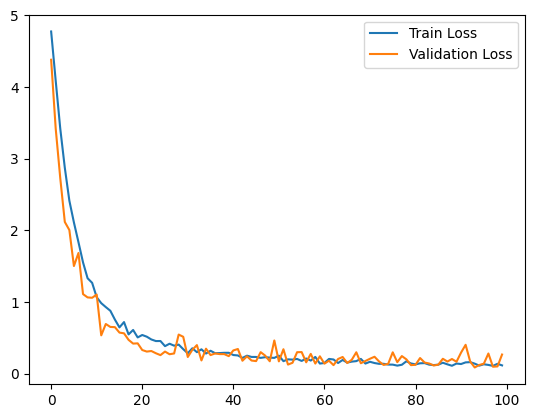

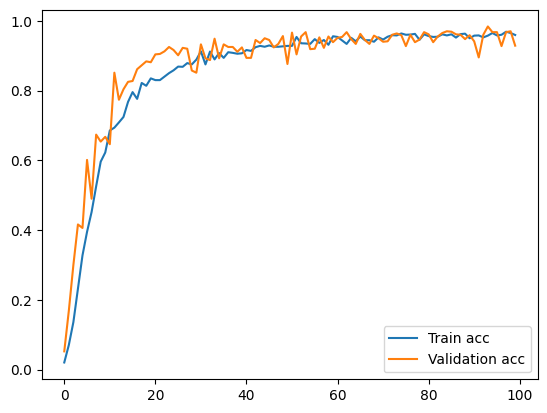

In [15]:
# model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

## Uso de Transfer Learning.

Guía documentación para transfer learning con Keras

https://keras.io/guides/transfer_learning/


### MobileNet

In [16]:
base_model = MobileNet(weights='imagenet', include_top=False)

# Add custom layers on top of the base_model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer with the number of classes in your dataset
num_classes = len(train_generator.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the custom model by specifying the input and output layers
modelMobileNet = Model(inputs=base_model.input, outputs=predictions)


# Optional: Freeze the layers of MobileNet so that they are not re-trained during the transfer learning process
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with an optimizer, loss, and metrics
modelMobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with your data
epochs = 3  # You can adjust the number of epochs based on the dataset size and convergence
modelMobileNet.fit(
    train_generator,
    epochs=epochs,
)

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/3
2116/2116 [==============================] - 225s 105ms/step - loss: 0.6841 - accuracy: 0.8093
Epoch 2/3
2116/2116 [==============================] - 222s 105ms/step - loss: 0.2463 - accuracy: 0.9214
Epoch 3/3
2116/2116 [==============================] - 225s 106ms/step - loss: 0.2148 - accuracy: 0.9336


In [17]:
kevaluation = modelMobileNet.evaluate(test_generator)

709/709 [==============================] - 19s 27ms/step - loss: 0.2739 - accuracy: 0.9416


In [18]:
# The evaluation result will be a list containing the loss and metrics values
loss = kevaluation[0]
accuracy = kevaluation[1]

print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2739, Test Accuracy: 0.9416



## Entrenamientos realizados (al menos 4). Hiperparametros utilizados en cada uno.




## Gráficas de resultados y sus comparaciones.



## Conclusiones.


## Enfoque futuro de interés

https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset


### Dataset

Mukhriddin Mukhiddinov. (2022). <i>Fruits and Vegetables dataset</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2468468

### Paper

Mukhiddinov, M.; Muminov, A.; Cho, J. Improved Classification Approach for Fruits and Vegetables Freshness Based on Deep Learning. Sensors 2022, 22, 8192. https://doi.org/10.3390/s22218192

# Referencias

[1] Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.


